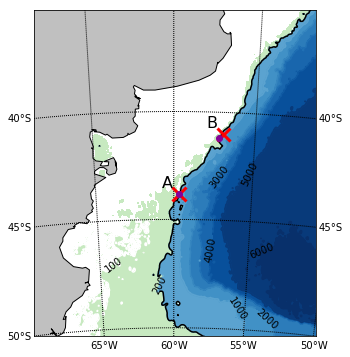

In [2]:
#=================================================Load data======================================================
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

topo=np.loadtxt('topo.dat')
lat=np.loadtxt('lat.dat')
lon=np.loadtxt('lon.dat')

#=================================================all bathymetry==================================================
lats=lat[(lat[:,0]>=-51) & (lat[:,0]<=-30)][:,(lon[0,:]>=-70) & (lon[0,:]<=-49.8)]
lons=lon[(lat[:,0]>=-51) & (lat[:,0]<=-30)][:,(lon[0,:]>=-70) & (lon[0,:]<=-49.8)]
tops=topo[(lat[:,0]>=-51) & (lat[:,0]<=-30)][:,(lon[0,:]>=-70) & (lon[0,:]<=-49.8)]
# 100 m
lat100=lat[(lat[:,0]>=-51) & (lat[:,0]<=-45)][:,(lon[0,:]>=-70) & (lon[0,:]<=-60)]
lon100=lon[(lat[:,0]>=-51) & (lat[:,0]<=-45)][:,(lon[0,:]>=-70) & (lon[0,:]<=-60)]
top100=topo[(lat[:,0]>=-51) & (lat[:,0]<=-45)][:,(lon[0,:]>=-70) & (lon[0,:]<=-60)]
# other bath
dcls=[200,1000,2000,3000,4000,5000,6000,7000]
lcls=[100,200]
lbs=[2000,3000,4000,6000,7000]
#=================================================Map==================================================
plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=-70.,llcrnrlat=-50.,urcrnrlon=-52.,urcrnrlat=-35.,
            projection='lcc',lat_1=-40.,lat_2=-45,lon_0=-60.,
            resolution ='l',area_thresh=1000.)
x, y = m(lons, lats)
m.drawcountries()
m.drawcoastlines()
m.fillcontinents(color='#C0C0C0')
m.drawparallels(np.arange(-70,-10,5),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,5),labels=[0,0,0,1])
csd = m.contour(x,y, tops,levels=dcls,cmap='Blues',vmin=-6000,vmax=6000)
csdf = m.contourf(x,y, tops,levels=dcls,cmap='Blues',vmin=-6000,vmax=6000)
cslf = m.contourf(x,y, tops,levels=lcls,cmap='Greens',vmin=0,vmax=600)
cs2 = m.contour(x,y, tops,levels=[200],colors='k')
# 100 m bath
x100, y100 = m(lon100, lat100)
cs1 = m.contour(x100,y100, top100,levels=[100],colors='w')
# 
plt.clabel(csd,lbs,fmt='%d',colors='k')
# 5000 m bath
cs5 = m.contour(x,y, tops,levels=[5000],colors='#083A7A')
manual_location5000 = [m(-55, -43)]
plt.clabel(cs5,fmt='%d',colors='k',manual=manual_location5000)
# 1000 m bath
cs1000 = m.contour(x,y, tops,levels=[1000],colors='#5ba3d0')
manual_location1000 = [m(-55, -49)]
plt.clabel(cs1000,fmt='%d',colors='k',manual=manual_location1000)
# 100 m
manual_location1 = [m(-64, -47)]
plt.clabel(cs1,fmt='%d',colors='k',manual=manual_location1)
manual_location2 = [m(-61, -48)]
plt.clabel(cs2,fmt='%d',colors='k',manual=manual_location2)
g2x,g2y=m(-59.673,-43.82)
plt.plot(g2x,g2y,'xr',mew=3,markersize=14)
t2x,t2y=m(-60.78,-43.5)
plt.text(t2x,t2y,'A',size=16)
g2x1,g2y1=m(-59.67,-43.8)
plt.plot(g2x1,g2y1,'.',markersize=12,color='#860197')
g4x,g4y=m(-57.003,-40.987)
plt.plot(g4x,g4y,'xr',mew=3,markersize=13)
t4x,t4y=m(-58,-40.7)
plt.text(t4x,t4y,'B',size=16)
g4x1,g4y1=m(-57.22,-41.2)
plt.plot(g4x1,g4y1,'.',markersize=12,color='#860197')
# plt.savefig('Figure1.eps',dpi=400)
plt.show()